(sec-sampling)=
# Sampling

In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('paper')
sns.set_style("whitegrid")

def lineplot(x, y, filename=None, title=None, xlim=None, ylim=None, ax=None, fig=None, **kargs):
    if not ax or not fig:
        fig, ax = plt.subplots()
    ax.plot(x, y, **kargs)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    if show:
        plt.show()
    if filename != None:
        fig.savefig(filename, bbox_inches='tight',
                    transparent=transparent, pad_inches=0, dpi=dpi)
    return fig, ax

On a computer we are dealing with digital signals, that is, discrete signals.
Sampling is the technique to transform a continious function 

$$y: \mathbb{R} \rightarrow \mathbb{C}$$

into a discrete representation 

$$y_{N}: \mathbb{Z} \rightarrow \mathbb{C}.$$

## Loss of Information

Indeed, that's not quite precise enough because we represent all [complex number](sec-complex-numbers) or irrational numbers by floating point numbers.
Therefore, for complex number $z = a + ib$,

$$a, b \in \mathbb{Q}$$

holds (most of the time).
Sampling in the context of audio means that we use equidistant sample points.

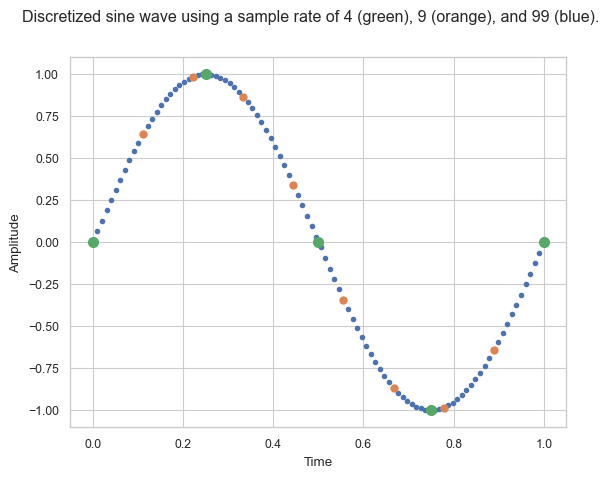

In [2]:
x1 = np.linspace(0, 1, 10)
y1 = np.sin(2*np.pi*x1)

x2 = np.linspace(0, 1, 5)
y2 = np.sin(2*np.pi*x2)

x3 = np.linspace(0, 1, 100)
y3 = np.sin(2*np.pi*x3)

fig, ax = lineplot(x3, y3, marker = 'o', ms=3.0, linestyle = 'None')
lineplot(x1, y1, fig=fig, ax=ax, marker = 'o', ms=5.0, linestyle = 'None')
lineplot(x2, y2, ax= ax, fig=fig, marker = 'o', ms=7.0, linestyle = 'None')
fig.suptitle(r'Discretized sine wave using a sample rate of 4 (green), 9 (orange), and 99 (blue).');

For example, let us assume our *sample rate* (also called sample frequency) $f_s$ is 2 hertz (Hz).
And let us assume we want to sample a sine wave $y(t) = \sin(2\pi \cdot f \cdot t)$ with a frequency of 6 Hz, i.e., $f = 6$.
Then 

$$y_N[0] \approx y(0), \ y_N[1] \approx y(0.5), \ y_N[2] \approx 1.0$$

and in general

$$y_N[n] \approx y\left(n \cdot \frac{1}{f_s} \right) = y(n \cdot T_s)$$

I indicate, that the value $y_N[n]$ is only an approximation, since on a computer we use a certain bit depth of our floating point numbers!
Therefore, we lose information, i.e. accuracy on two ends:
(1) first of all in the **time direction** but also (2) in the **amplitude direction**.

(sec-aliasing)=
## Aliasing

Calling 

```isc
s.sampleRate // 44100 Hz
```

gives us the *sample rate* of our audio signals.
On my machine, I use a sample rate of 44100 Hz, i.e. 44100 samples per second.
Therefore, a audio signal $y: \mathbb{N} \rightarrow \mathbb{Q}$ represents 1 seconds by 44100 samples (rational numbers)

$$y[i], y[i+1], \ldots, y[i+44099].$$

When the highest frequency of a signal is less than one-half of the sample rate, the resulting discrete-time sequence is said to be free of the distortion known as **aliasing** (different signals become indistinguishable to each other).
This follows from the so called *Nyquist–Shannon sampling theorem*.

````{admonition} Nyquist–Shannon Sampling Theorem
:name: theorem-sampling
:class: theorem

If a function $y(t)$ contains no frequencies higher than $f$ hertz, it is completely determined by giving its ordinates at a series of points spaced $1/(2f)$ seconds apart.
````

Aliasing can also generate frequencies that are not truly present.
To avoid aliasing, the sampling rate must be more than twice the highest frequency of the sampled signal.

````{admonition} Aliasing
:name: def-aliasing
:class: definition

*Aliasing* is the effect that result from a two small *sample rate* by which different signals become indistinguishable to each other.
````

In the example above we can observe aliasing.
We can see that a sample rate of 2 Hz is too low to capture $y(t) = \sin(2\pi \cdot f \cdot t)$ for $f = 2, 3, 6$ Hz.
All these sine waves appear to be a sine wave of 1 Hz.
They are indistinguishable if we use a *sample rate* that low.

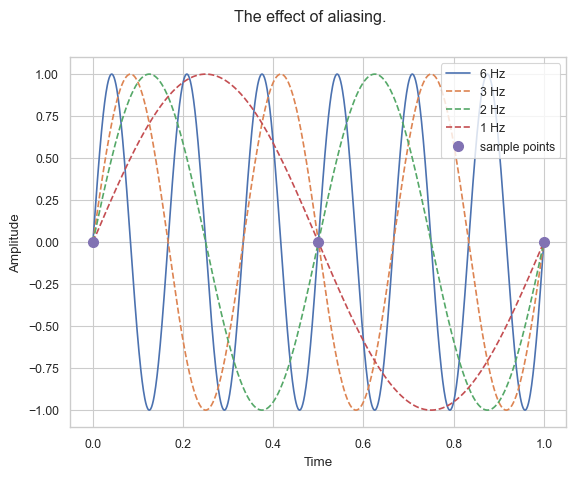

In [3]:
f = 6
f_s = 2
x1 = np.linspace(0, 1, 1000)
y1 = np.sin(2*np.pi*f*x1)

x_s = np.linspace(0, 1, f_s+1)
y_s = np.sin(2*np.pi*f*x_s)

x2 = np.linspace(0, 1, 1000)
y2 = np.sin(2*np.pi*f/2*x2)

x3 = np.linspace(0, 1, 1000)
y3 = np.sin(2*np.pi*f/3*x2)

x4 = np.linspace(0, 1, 1000)
y4 = np.sin(2*np.pi*f/6*x2)

fig, ax = lineplot(x1, y1, label=r'6 Hz')
lineplot(x2, y2, ax= ax, fig=fig, linestyle = '--', label=r'3 Hz')
lineplot(x3, y3, ax= ax, fig=fig, linestyle = '--', label=r'2 Hz')
lineplot(x4, y4, ax= ax, fig=fig, linestyle = '--', label=r'1 Hz')
lineplot(x_s, y_s, ax= ax, fig=fig, marker = 'o', ms=7.0, linestyle = 'None', label='sample points');
ax.legend();
fig.suptitle(r'The effect of aliasing.');

The human ear is able to recognize frequencies up to round about 20000 Hz.
Since we need double the *sample rate*, 44100 gives us a little bit of room.